In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2.3.0


## 1. Загрузка данных

In [ ]:
def load_movie_data (p_file_path):
    '''Загрузка данных о фильмах в датафрейм в формате id	title	genre	genre_id	description.
    Значения в файле должны разделяться символами " ::: ".
    Информаци о новом фильме должна начинаться с ново строки

    :param p_file_path: путь к файлу
    :return DataFrame'''

    f = open(p_file_path)

    add_rows ={}
    index = 0
    for line in f:
        attributes = line.replace('\n', '').split(' ::: ')

        if len (attributes) < 4:
            continue

        add_rows[index] = {'id': attributes[0],
                           'title': attributes[1],
                           'genre': attributes[2],
                           'description': attributes[3]}

        index = index + 1

    #for

    f.close()

    return pd.DataFrame.from_dict(add_rows, "index")

#load_data

In [ ]:
#загружаем данные для обучения
train_df = load_movie_data ('data/train_data.txt')

train_df

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


,genre,genre_cnt
0,drama,13613
1,documentary,13096
2,comedy,7447
3,short,5073
4,horror,2204
5,thriller,1591
6,action,1315
7,western,1032
8,reality-tv,884
9,family,784


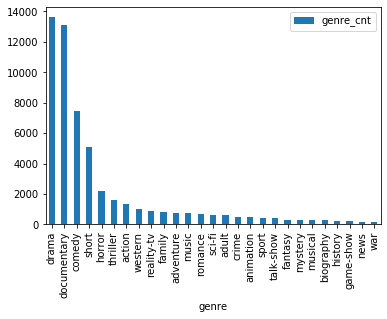

In [ ]:
# Посмотрим распределение по жанрам

genre_count_df = train_df[['id','genre']].groupby('genre').agg('count').sort_values('id', ascending = False)

genre_count_df.reset_index(inplace = True)
genre_count_df.rename(columns ={'id':'genre_cnt'}, inplace = True)

genre_count_df.plot.bar(y = 'genre_cnt', x = 'genre')

genre_count_df

In [ ]:
#Загружаем тестовые данные
test_df = load_movie_data ('data/test_data_solution.txt')

test_df

,id,title,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Dar..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their ...
54197,54198,Oliver Twink (2007),adult,"A movie 169 years in the making. Oliver Twist,..."
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard ..."
